In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_excel('.\ODH_No_metal.xlsx')
data.head()

,序号,催化剂引用的文献,催化剂种类,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,...,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel,丙烯产率
0,1.0,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1,0.057594
1,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt/BN,Pt,1.1,2.28,NaN,NaN,NaN,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0,0.064600
2,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9,0.317031
3,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.25)/BN,Pt,1.1,2.28,Sn,0.25,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3,0.067140
4,NaN,"Chem. Eng. J. 2008, 140(1–3), 391–397. DOI: 10...",Pt-Sn(0.50)/BN,Pt,1.1,2.28,Sn,0.50,1.96,BN,...,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2,0.375408


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   序号        101 non-null    float64
 1   催化剂引用的文献  239 non-null    object 
 2   催化剂种类     239 non-null    object 
 3   金属1       50 non-null     object 
 4   占比1       50 non-null     float64
 5   金属1电负性    50 non-null     float64
 6   金属2       12 non-null     object 
 7   占比2       12 non-null     float64
 8   金属2电负性    12 non-null     float64
 9   非金属1      225 non-null    object 
 10  占比3       225 non-null    float64
 11  负载1       97 non-null     object 
 12  占比4       97 non-null     float64
 13  C2H6      11 non-null     float64
 14  C3H8      239 non-null    float64
 15  O2        239 non-null    float64
 16  保护气体      239 non-null    float64
 17  金属基       0 non-null      float64
 18  形态        239 non-null    int64  
 19  GHSV      230 non-null    float64
 20  温度        239 non-null    int64 

In [4]:
data=data.loc[:,'金属1':'Sel']
data

,金属1,占比1,金属1电负性,金属2,占比2,金属2电负性,非金属1,占比3,负载1,占比4,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,Pt,1.1,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1
1,Pt,1.1,2.28,NaN,NaN,NaN,BN,98.90,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0
2,Pt,1.1,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9
3,Pt,1.1,2.28,Sn,0.25,1.96,BN,98.65,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3
4,Pt,1.1,2.28,Sn,0.50,1.96,BN,98.40,NaN,NaN,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,NaN,NaN,NaN,NaN,NaN,NaN,B,0.28,MCM-41,99.72,NaN,8.3,8.3,83.4,NaN,2,28800.0,550,2.5,34.0
235,NaN,NaN,NaN,NaN,NaN,NaN,B,0.28,MCM-41,99.72,NaN,8.3,8.3,83.4,NaN,2,28800.0,575,4.5,40.0
236,NaN,NaN,NaN,NaN,NaN,NaN,B,0.28,MCM-41,99.72,NaN,8.3,8.3,83.4,NaN,2,28800.0,600,9.0,38.0
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCM-41,100.00,NaN,8.3,8.3,83.4,NaN,2,28800.0,575,2.0,25.0


In [5]:
data.loc[:,'GHSV'].fillna(data.loc[:,'GHSV'].mean(),inplace=True)
data.loc[:,'Con'].fillna(data.loc[:,'Con'].mean(),inplace=True)
data.loc[:,'Sel'].fillna(data.loc[:,'Sel'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   金属1     50 non-null     object 
 1   占比1     50 non-null     float64
 2   金属1电负性  50 non-null     float64
 3   金属2     12 non-null     object 
 4   占比2     12 non-null     float64
 5   金属2电负性  12 non-null     float64
 6   非金属1    225 non-null    object 
 7   占比3     225 non-null    float64
 8   负载1     97 non-null     object 
 9   占比4     97 non-null     float64
 10  C2H6    11 non-null     float64
 11  C3H8    239 non-null    float64
 12  O2      239 non-null    float64
 13  保护气体    239 non-null    float64
 14  金属基     0 non-null      float64
 15  形态      239 non-null    int64  
 16  GHSV    239 non-null    float64
 17  温度      239 non-null    int64  
 18  Con     239 non-null    float64
 19  Sel     239 non-null    float64
dtypes: float64(14), int64(2), object(4)
memory usage: 37.5+ KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_32428\3203891711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,'GHSV'].fillna(data.loc[:,'GHSV'].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_32428\3203891711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [6]:
data1 = list(set(pd.concat([data.iloc[:, 0], data.iloc[:, 3]])))
data1

['Pt', nan, 'Ti', 'Ni', 'W', 'V', 'Sn', 'Hf', 'Mg']

In [7]:
data_1 = pd.DataFrame(np.zeros((239, 9)), columns=data1)
data_1

,Pt,NaN,Ti,Ni,W,V,Sn,Hf,Mg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
num_1 = 0
for i in data.iloc[:, 0]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 1]
        num_1 = num_1 + 1
num_1 = 0
for i in data.iloc[:, 3]:
    if i in data1:
        index_2 = data1.index(i)
        index_1 = num_1
        data_1.iloc[index_1, index_2] = data.iloc[num_1, 4]
        num_1 = num_1 + 1
data_1 = data_1.dropna(axis=1)

In [9]:
data2 = list(set(data.iloc[:, 6]))
len(data2)

10

In [10]:
data_2 = pd.DataFrame(np.zeros((239, 10)), columns=data2)

In [11]:
num_1 = 0
for i in data.iloc[:, 6]:
    if i in data2:
        index_2 = data2.index(i)
        index_1 = num_1
        data_2.iloc[index_1, index_2] = data.iloc[num_1, 7]
        num_1 = num_1 + 1
data_2 = data_2.dropna(axis=1)

In [12]:
data_2.head()

,B2O3,Si,B,P,C,CB,BN,BON,BPO4
0,0.0,0.0,0.0,0.0,0.0,0.0,98.90,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,98.90,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,98.65,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,98.65,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,98.40,0.0,0.0


In [13]:
data3 = list(set(data.iloc[:, 8]))
len(data3)

9

In [14]:
data_3 = pd.DataFrame(np.zeros((239,9)), columns=data3)

In [15]:
num_1 = 0
for i in data.iloc[:, 8]:
    if i in data3:
        index_2 = data3.index(i)
        index_1 = num_1
        data_3.iloc[index_1, index_2] = data.iloc[num_1, 9]
        num_1 = num_1 + 1
data_3 = data_3.dropna(axis=1)

In [16]:
data_3

,Si,C,BPO4,MCM-41,SBA-15,S-1,SiO2,Al2O3
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
234,0.0,0.0,0.0,99.72,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,99.72,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,99.72,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0


In [17]:
data_use=pd.concat([data_1,data_2,data_3,data.loc[:,'C2H6':'Sel']],axis=1)
data_use

,Pt,Ti,Ni,W,V,Sn,Hf,Mg,B2O3,Si,...,C2H6,C3H8,O2,保护气体,金属基,形态,GHSV,温度,Con,Sel
0,1.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,17.4,33.1
1,1.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,19.0,34.0
2,1.1,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,42.9,73.9
3,1.1,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,18.0,37.3
4,1.1,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,...,NaN,80.0,4.2,15.8,NaN,2,4760.0,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,8.3,8.3,83.4,NaN,2,28800.0,550,2.5,34.0
235,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,8.3,8.3,83.4,NaN,2,28800.0,575,4.5,40.0
236,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,8.3,8.3,83.4,NaN,2,28800.0,600,9.0,38.0
237,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,8.3,8.3,83.4,NaN,2,28800.0,575,2.0,25.0


In [18]:
data_use.fillna(0,inplace=True)
data_use=data_use.drop(['金属基'],axis=1)
data_use

,Pt,Ti,Ni,W,V,Sn,Hf,Mg,B2O3,Si,...,Al2O3,C2H6,C3H8,O2,保护气体,形态,GHSV,温度,Con,Sel
0,1.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.0,600,17.4,33.1
1,1.1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.0,600,19.0,34.0
2,1.1,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.0,600,42.9,73.9
3,1.1,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.0,600,18.0,37.3
4,1.1,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,80.0,4.2,15.8,2,4760.0,600,47.4,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,8.3,8.3,83.4,2,28800.0,550,2.5,34.0
235,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,8.3,8.3,83.4,2,28800.0,575,4.5,40.0
236,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,8.3,8.3,83.4,2,28800.0,600,9.0,38.0
237,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,8.3,8.3,83.4,2,28800.0,575,2.0,25.0


In [19]:
data_use.to_csv('use_N.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


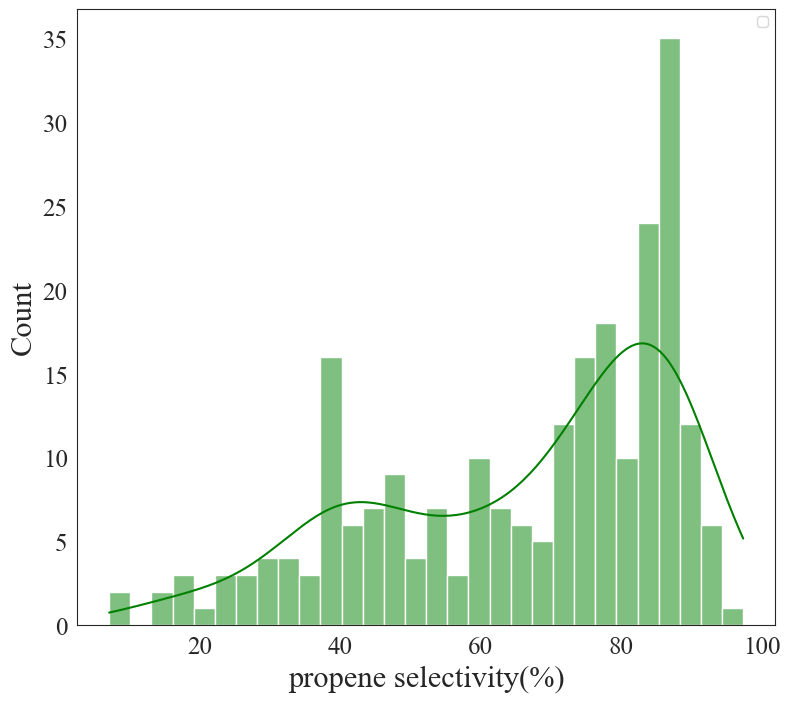

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(9,8))
sns.histplot(data_use['Sel'],color='g',bins=30,kde=True)
plt.xlabel('propene selectivity(%)',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('Count',fontsize=22,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=18,fontname='Times New Roman')
plt.yticks(fontsize=18,fontname='Times New Roman')
plt.legend()
plt.show()

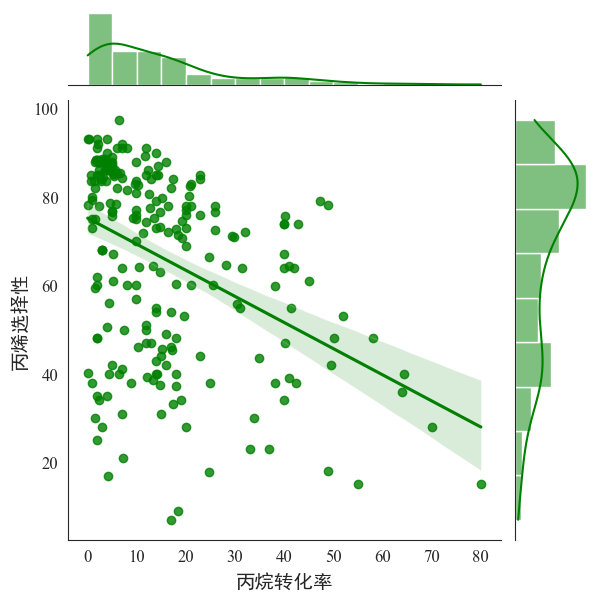

In [21]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Con",y="Sel",data=data,kind='reg',color='g')
plt.xlabel('丙烷转化率',fontsize=14)
plt.ylabel('丙烯选择性',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()

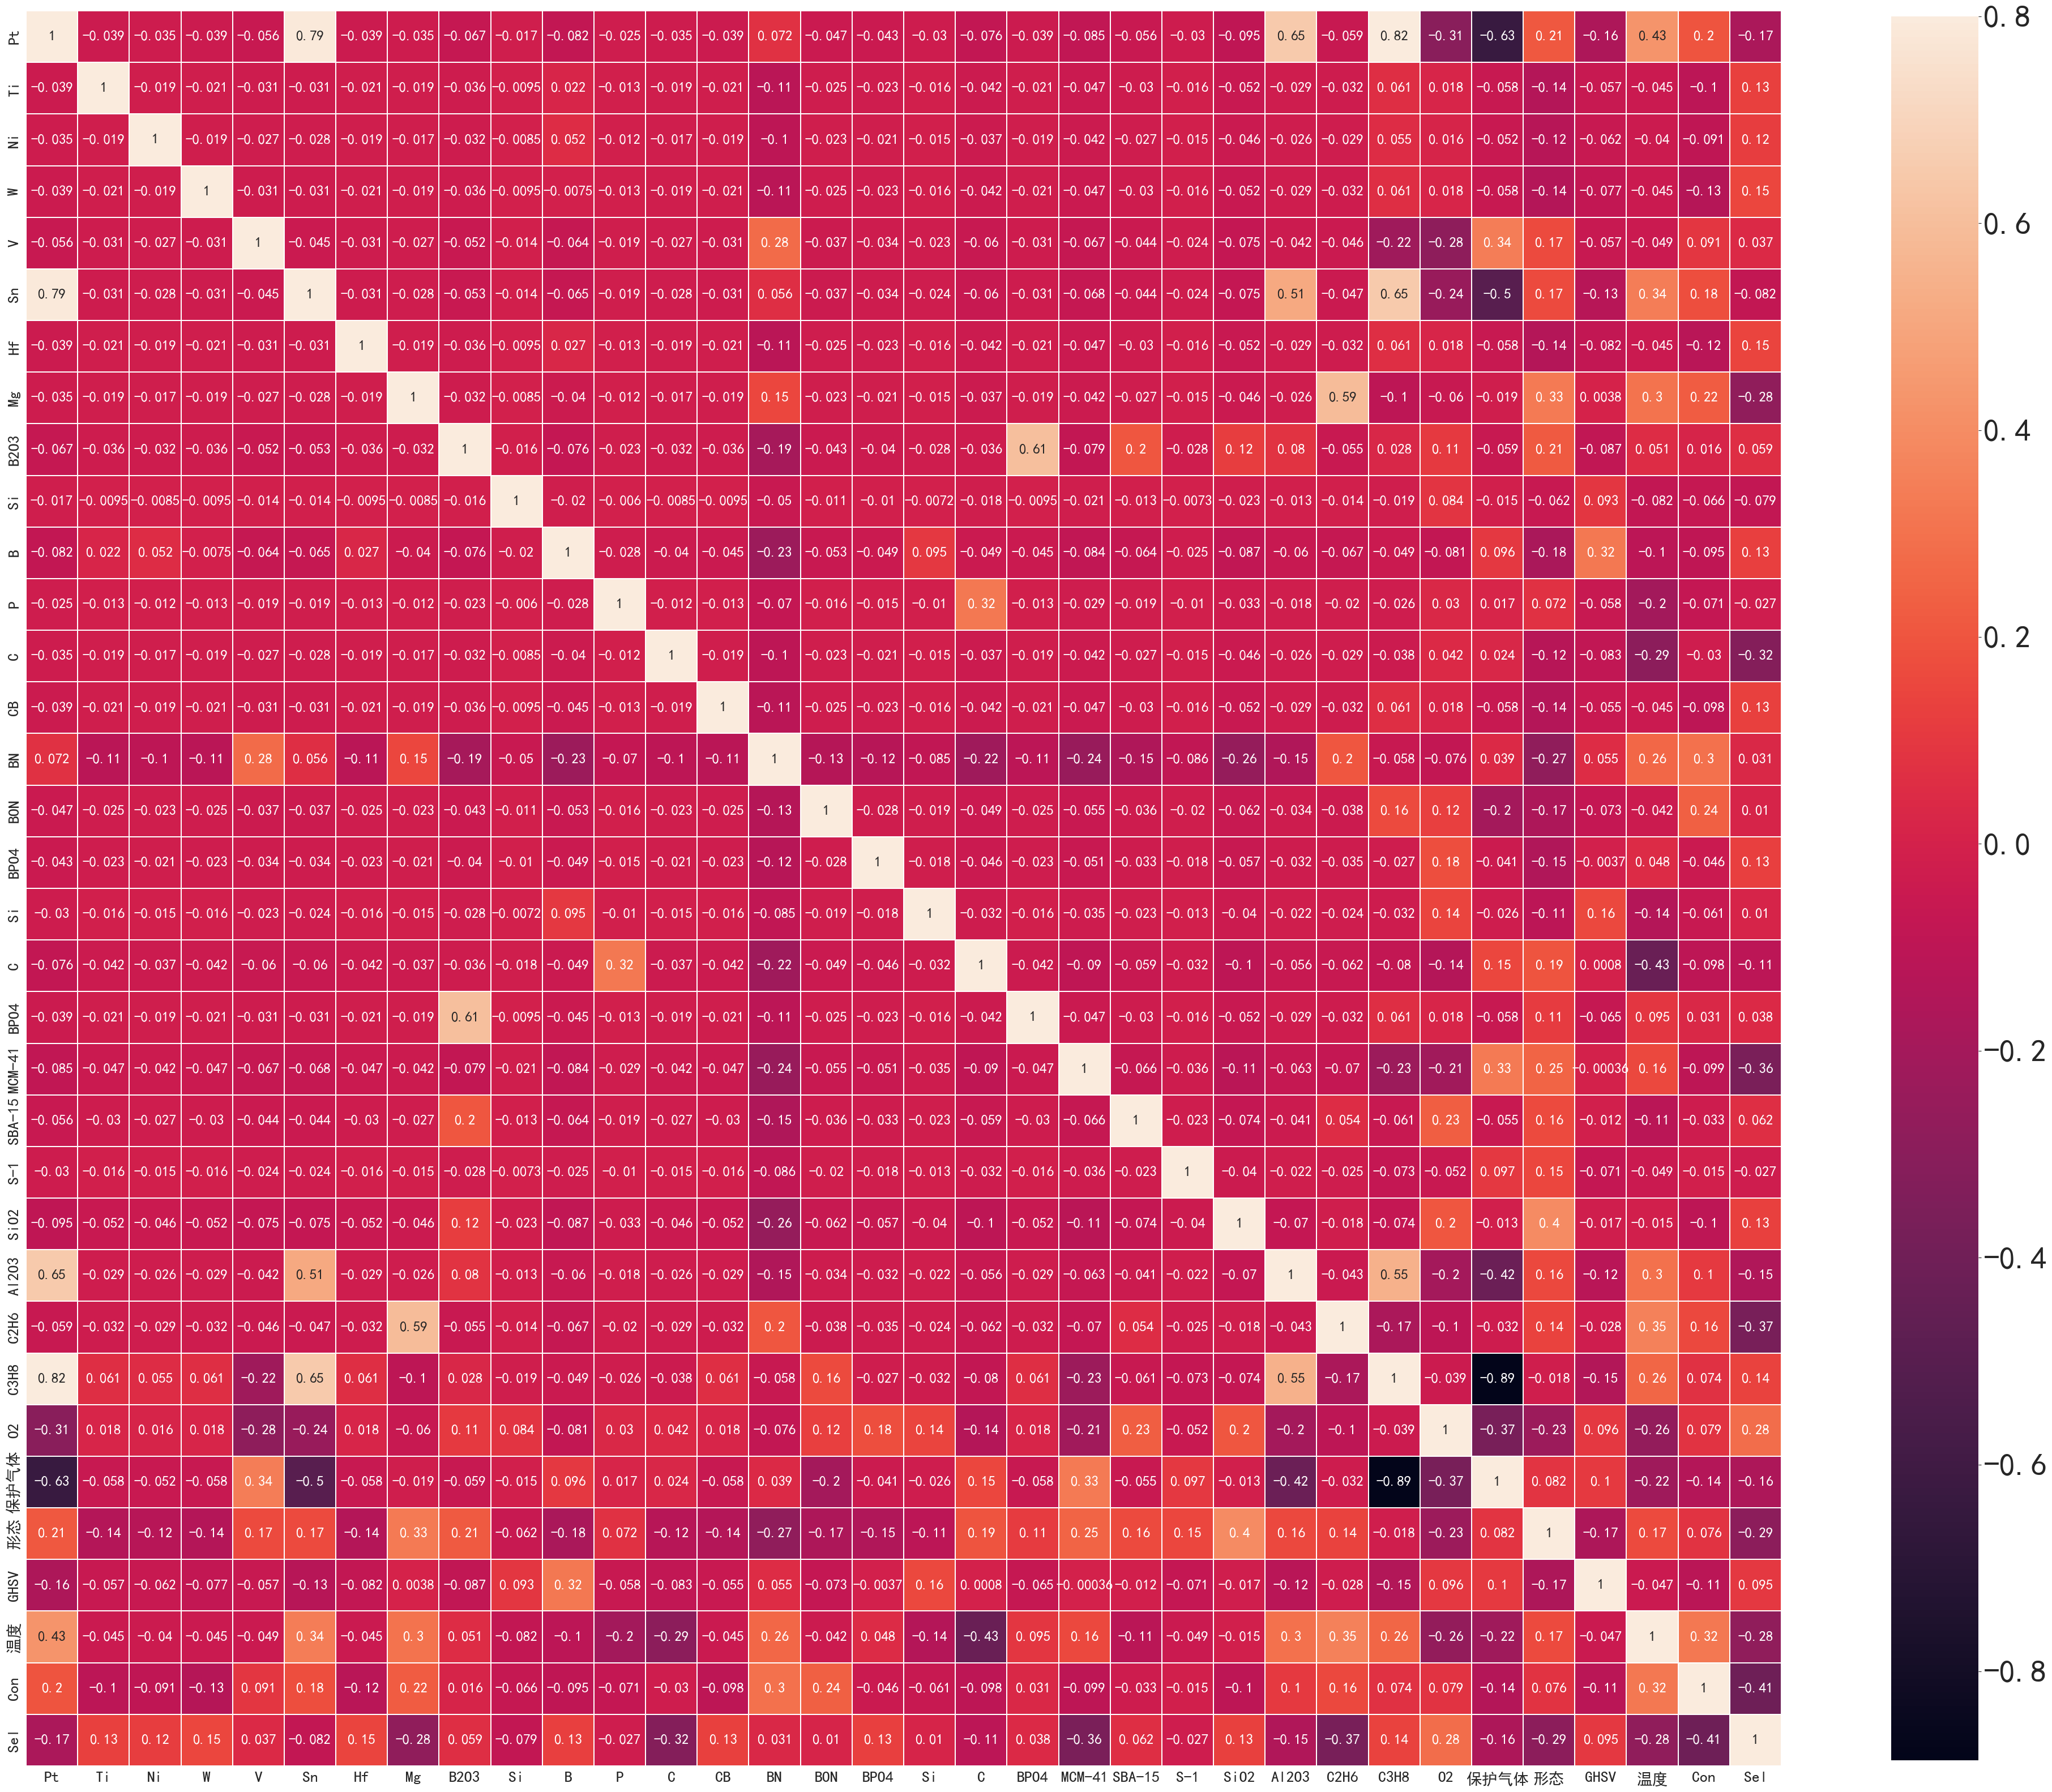

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(data_use.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()